Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  It shares the same image size and structure of training and testing splits.

- ## Try to build a classifier for the Fashion-MNIST dataset that achieves over 85% accuracy on the test set. 
- ## Use only classifiers that are used in the Chapter 3 of the textbook.
- ## Do the error analysis following the textbook.

In [1]:
# Check GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# !mkdir -p my_drive
# !google-drive-ocamlfuse my_drive
# #!mkdir -p my_drive/Fashion

In [0]:
# !python3 /content/my_drive/Fashion/mnist_reader.py

In [0]:
import sys
sys.path.append('/content/my_drive/Fashion')

----------Everything above this is for Google Coloab----------

In [0]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [0]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('/content/my_drive/Fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/content/my_drive/Fashion', kind='t10k')

In [7]:
X_train.shape

(60000, 784)

In [8]:
y_train.shape

(60000,)

### Labels
Each training and test example is assigned to one of the following labels:

Label	Description
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [0]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

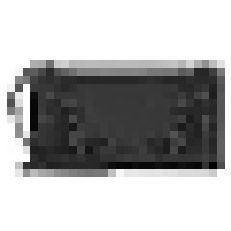

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_train[36001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

In [11]:
y_train[36001]

8

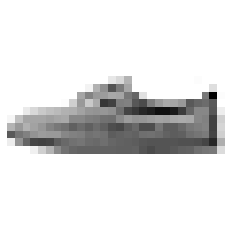

In [12]:
plot_digit(X_train[40000])

In [13]:
y_train[40000]

7

In [0]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

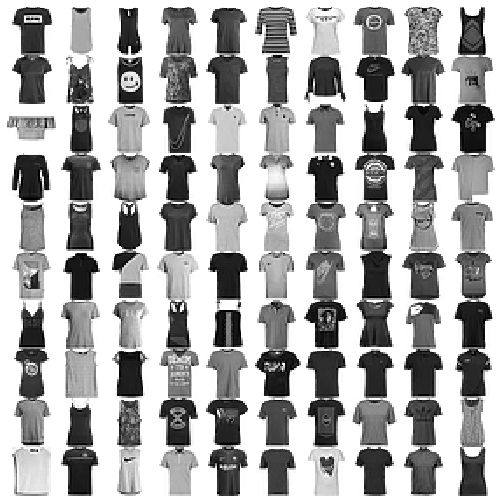

In [15]:
plt.figure(figsize=(9,9))
X_0 = X_train[(y_train == 0)]
example_images = X_0[:100]
plot_digits(example_images, images_per_row=10)

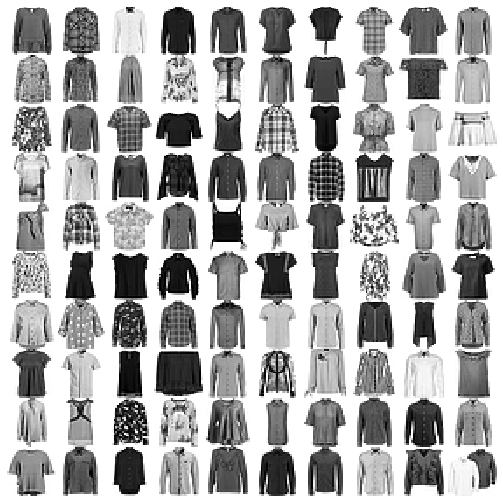

In [16]:
plt.figure(figsize=(9,9))
X_6 = X_train[(y_train == 6)]
example_images = X_6[:100]
plot_digits(example_images, images_per_row=10)

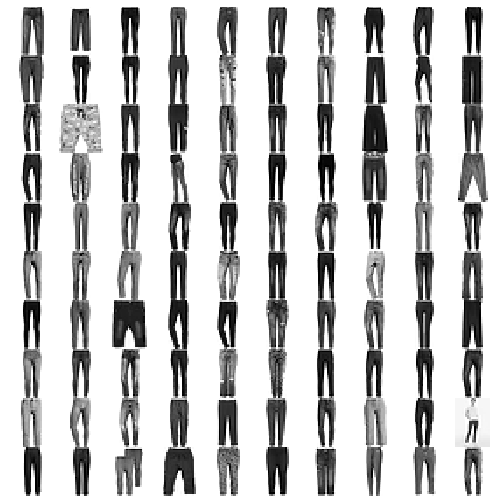

In [17]:
plt.figure(figsize=(9,9))
X_1 = X_train[(y_train == 1)]
example_images = X_1[:100]
plot_digits(example_images, images_per_row=10)

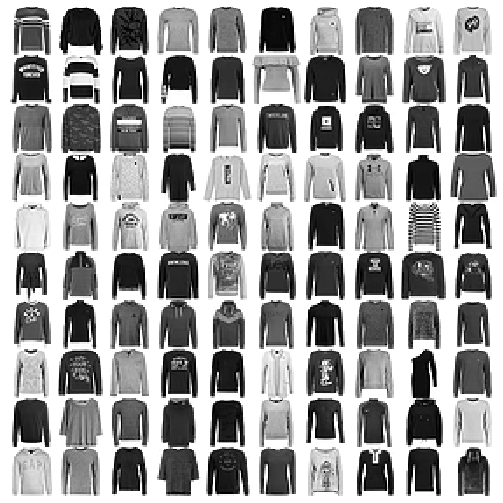

In [18]:
plt.figure(figsize=(9,9))
X_2 = X_train[(y_train == 2)]
example_images = X_2[:100]
plot_digits(example_images, images_per_row=10)

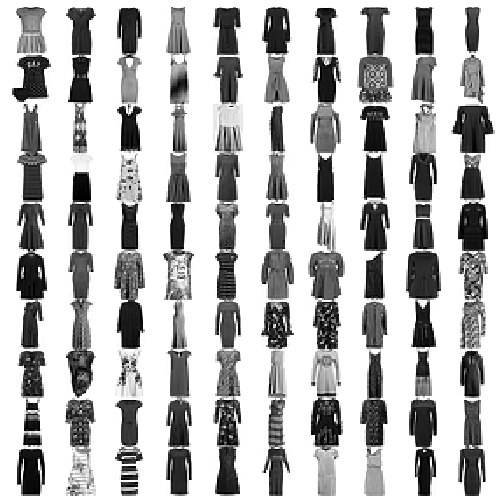

In [19]:
plt.figure(figsize=(9,9))
X_3 = X_train[(y_train == 3)]
example_images = X_3[:100]
plot_digits(example_images, images_per_row=10)

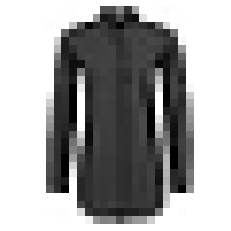

In [20]:
some_article = X_train[1014]
plot_digit(some_article)

In [21]:
y_train[1014]

6

# Training a Binary classifier to identify the shirt

In [0]:
y_train_shirt = (y_train == 6)
y_test_shirt = (y_train == 6)

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_shirt)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# Performance measures

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_shirt, cv=3, scoring="accuracy")

array([0.88805, 0.794  , 0.91905])

In [0]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3, random_state=42)

# for train_index, test_index in skfolds.split(X_train, y_train_sneaker):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_sneaker[train_index]
#     X_test_fold = X_train[test_index]
#     y_test_fold = y_train_sneaker[test_index]

#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_shirt, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_shirt, y_train_pred)

array([[47957,  6043],
       [ 1935,  4065]])

In [28]:
y_train_perfect_predictions = y_train_shirt  # pretend we reached perfection
confusion_matrix(y_train_shirt, y_train_perfect_predictions)

array([[54000,     0],
       [    0,  6000]])

In [29]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_shirt, y_train_pred)

0.40215670755836963

In [30]:
recall_score(y_train_shirt, y_train_pred)

0.6775

In [31]:
from sklearn.metrics import f1_score

f1_score(y_train_shirt, y_train_pred)

0.504718152470822

In [0]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_shirt, cv=3, method="decision_function")

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_shirt, y_scores)

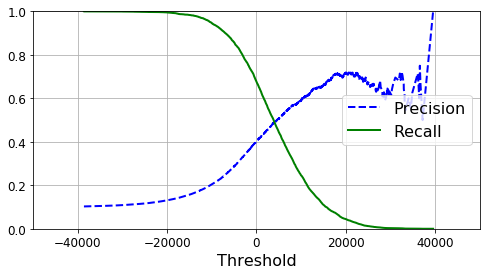

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

#save_fig("precision_recall_vs_threshold_plot")  # Not shown
plt.show()

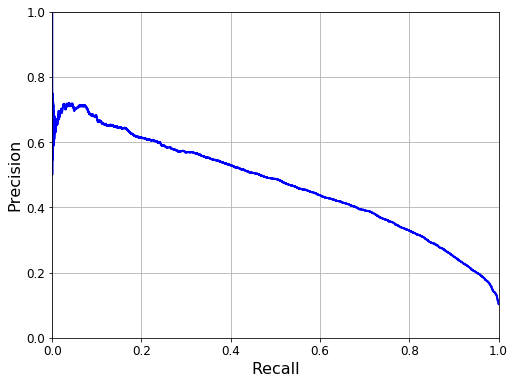

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

#save_fig("precision_vs_recall_plot")
plt.show()

Sneaker Binary Classifier for comparison

In [0]:
y_train_sneaker = (y_train == 7)
y_scores_sneaker = cross_val_predict(sgd_clf, X_train, y_train_sneaker, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_sneaker, y_scores_sneaker)

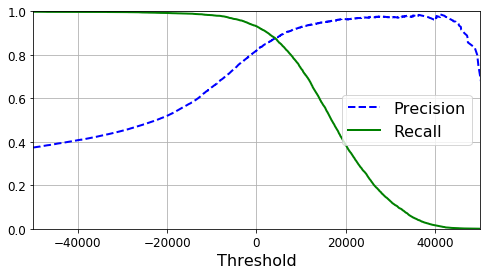

In [37]:
plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#save_fig("precision_recall_vs_threshold_plot")  # Not shown
plt.show()

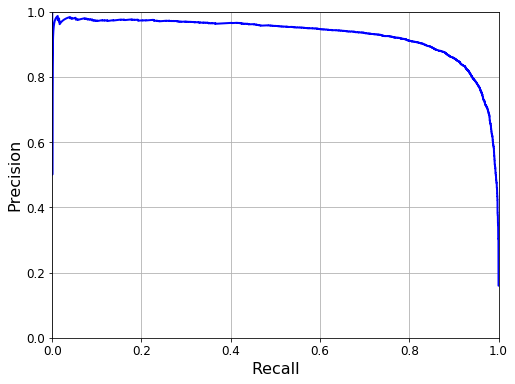

In [38]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.show()

# ROC Curves

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_shirt, y_scores)

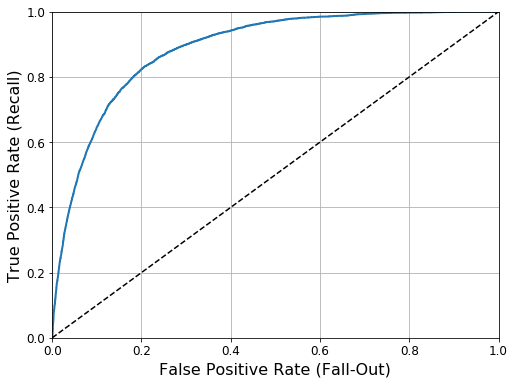

In [40]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)

#save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_shirt, y_scores)

0.8873327407407408

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_shirt, cv=3, method="predict_proba")

In [0]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_shirt,y_scores_forest)

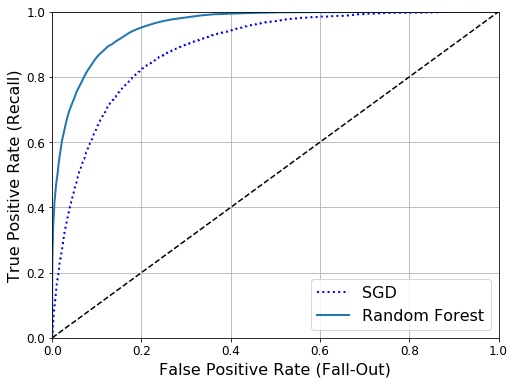

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [45]:
roc_auc_score(y_train_shirt, y_scores_forest)

0.956154913580247

In [46]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_shirt, cv=3)
precision_score(y_train_shirt, y_train_pred_forest)

0.9063670411985019

In [47]:
recall_score(y_train_shirt, y_train_pred_forest)

0.4033333333333333

# Multiclass classification

In [0]:
#from sklearn.svm import SVC

In [0]:
#from sklearn.multiclass import OneVsRestClassifier
#ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
#ovr_clf.fit(X_train, y_train)

In [50]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [0]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred_forest)

0.8802

88% Accuracy

In [0]:
#cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

# Error Analysis

In [55]:
conf_mx = confusion_matrix(y_train, y_train_pred_forest)
conf_mx

array([[5169,    2,   88,  192,   26,    4,  458,    0,   61,    0],
       [   7, 5793,   23,  136,    8,    1,   30,    0,    2,    0],
       [  37,    3, 4872,   63,  674,    1,  311,    0,   39,    0],
       [ 120,   19,   45, 5513,  171,    0,  124,    0,    8,    0],
       [  14,    7,  480,  212, 5005,    1,  260,    0,   20,    1],
       [   0,    0,    0,    1,    0, 5732,    2,  180,   24,   61],
       [ 945,    5,  699,  150,  527,    3, 3575,    0,   96,    0],
       [   0,    0,    0,    0,    0,  106,    0, 5619,    9,  266],
       [   9,    2,   23,   21,   22,   17,   71,   12, 5822,    1],
       [   0,    0,    2,    1,    0,   67,    3,  208,    7, 5712]])

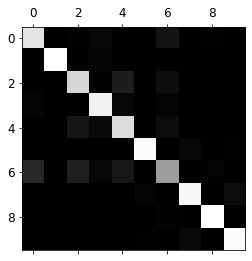

In [56]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [0]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

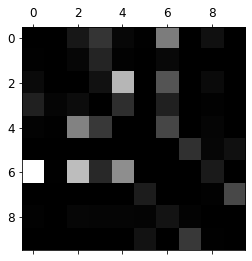

In [58]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

6(shirt) is confused with 0(T-shirt/top) the most

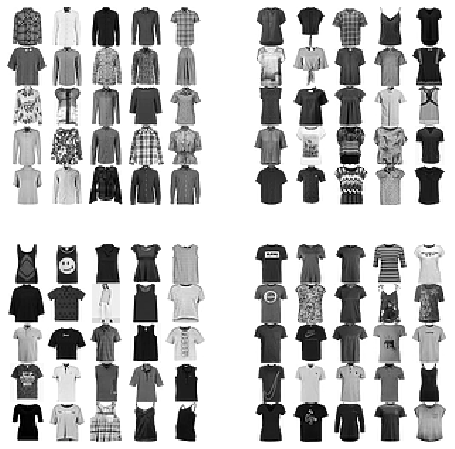

In [59]:
cl_a, cl_b = 6, 0
X_aa = X_train[(y_train == cl_a) & (y_train_pred_forest == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred_forest == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred_forest == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred_forest == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

The error / loss in accuraccy is mostly coming from the shirt being confused for a T-shirt or top. This confusion is from the length of the sleeves and is not easy to tell.

# Testing test sample

In [0]:
y_test_pred = forest_clf.predict(X_test)

In [61]:
accuracy_score(y_test, y_test_pred)

0.876

87% Accuracy